Предсказание оттока пользователей (весна 2023)


---


Alexandra Obidina



Исследование данных

> Загрузка данных



In [175]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [176]:
train_data = pd.read_csv('./train.csv')
test_data  = data = pd.read_csv('./test.csv')

numeric_indices = np.array([0, 1, 2])
categorical_indices = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [177]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
train_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
test_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [ ]:
train_data.info() #в обучающей выборке отсутствуют нулевые значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
train_data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [183]:
train_data['TotalSpent'] = pd.to_numeric(train_data['TotalSpent'], errors='coerce') #Пропущенные значения обращаются в NaN, т.к. errors='coerce'
train_data.isna().sum() #имеем 9 значений NaN в столбце TotalSpent

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [184]:
train_data['TotalSpent'] = train_data['TotalSpent'].fillna(0).astype(float)
train_data.isna().sum() #заменили значения NaN на нули

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [185]:
#проделаем то же самое с выборкой test_data
test_data['TotalSpent'] = pd.to_numeric(test_data['TotalSpent'], errors='coerce') #Пропущенные значения обращаются в NaN, т.к. errors='coerce'
test_data['TotalSpent'] = train_data['TotalSpent'].fillna(0).astype(float)



> Анализ данных



In [186]:
numeric_data = train_data[train_data.columns[numeric_indices]]
categorial_data = train_data[train_data.columns[categorical_indices]]

categorial_data.head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [ ]:
for col in cat_cols:
  print(col + ": ")
  print(train_data[col].unique(), len(train_data[col].unique()))

Sex: 
['Male' 'Female'] 2
IsSeniorCitizen: 
[0 1] 2
HasPartner: 
['Yes' 'No'] 2
HasChild: 
['Yes' 'No'] 2
HasPhoneService: 
['Yes' 'No'] 2
HasMultiplePhoneNumbers: 
['No' 'Yes' 'No phone service'] 3
HasInternetService: 
['No' 'Fiber optic' 'DSL'] 3
HasOnlineSecurityService: 
['No internet service' 'No' 'Yes'] 3
HasOnlineBackup: 
['No internet service' 'No' 'Yes'] 3
HasDeviceProtection: 
['No internet service' 'No' 'Yes'] 3
HasTechSupportAccess: 
['No internet service' 'Yes' 'No'] 3
HasOnlineTV: 
['No internet service' 'No' 'Yes'] 3
HasMovieSubscription: 
['No internet service' 'No' 'Yes'] 3
HasContractPhone: 
['One year' 'Two year' 'Month-to-month'] 3
IsBillingPaperless: 
['No' 'Yes'] 2
PaymentMethod: 
['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)'] 4


Гистограмма для числовых признаков:

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

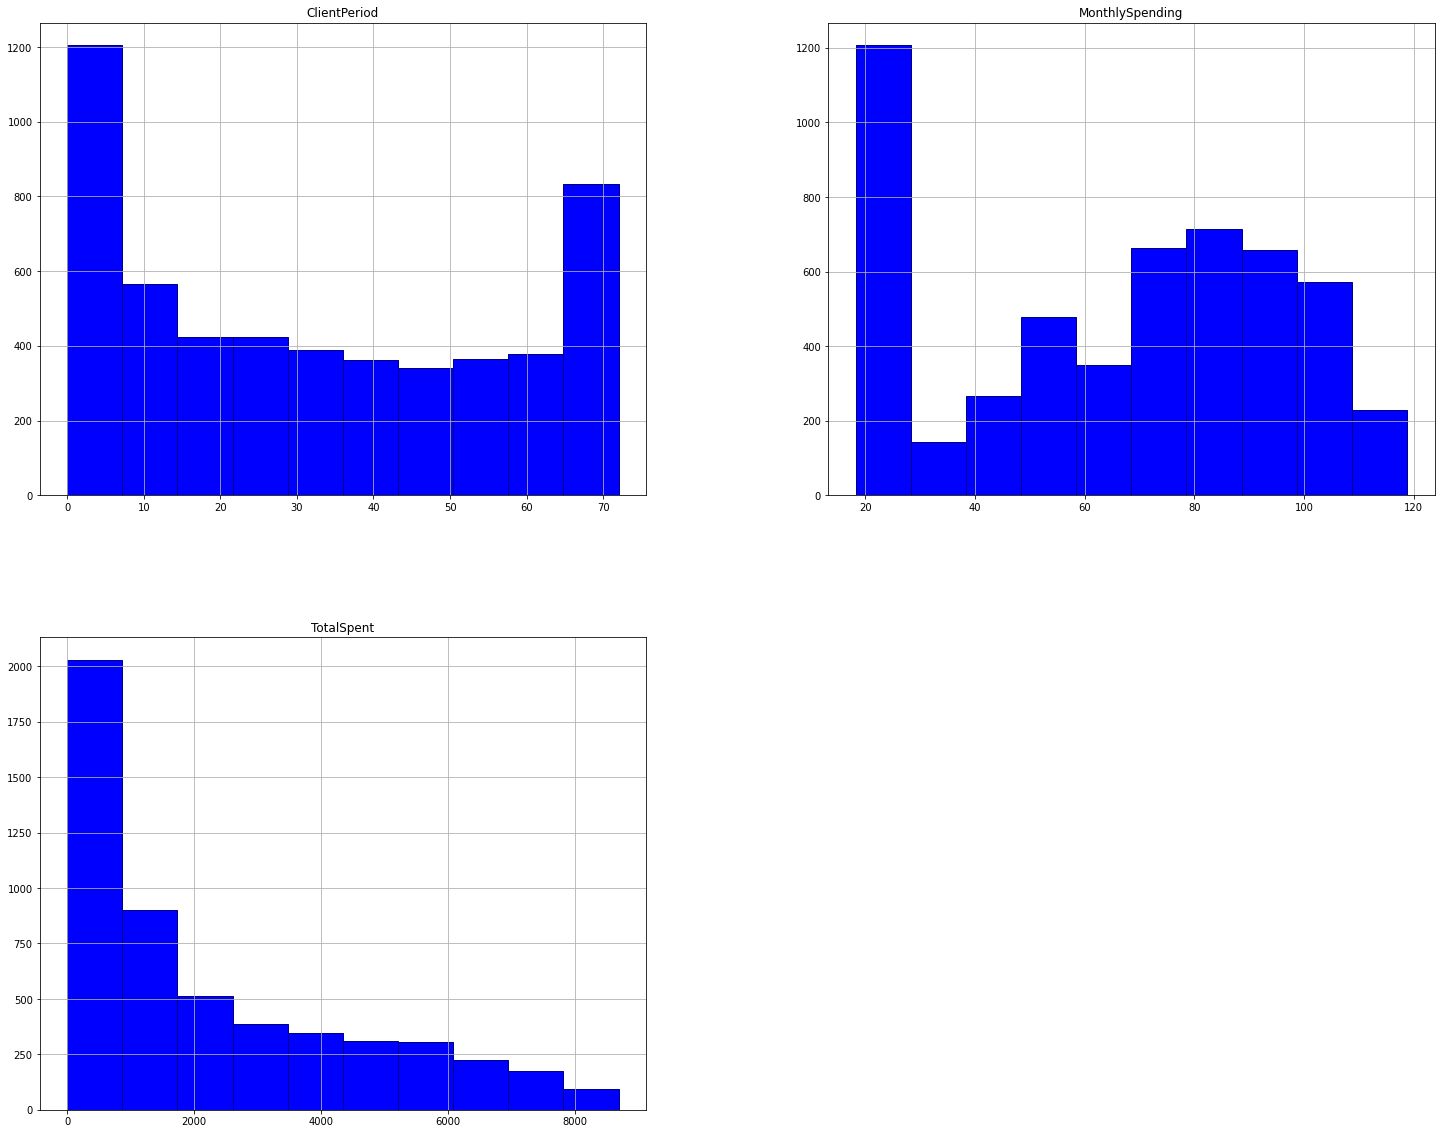

In [ ]:
train_data[num_cols].hist(figsize=(25, 20), bins=10, color='blue', ec='darkblue')

Гистограмма для категориальных признаков:

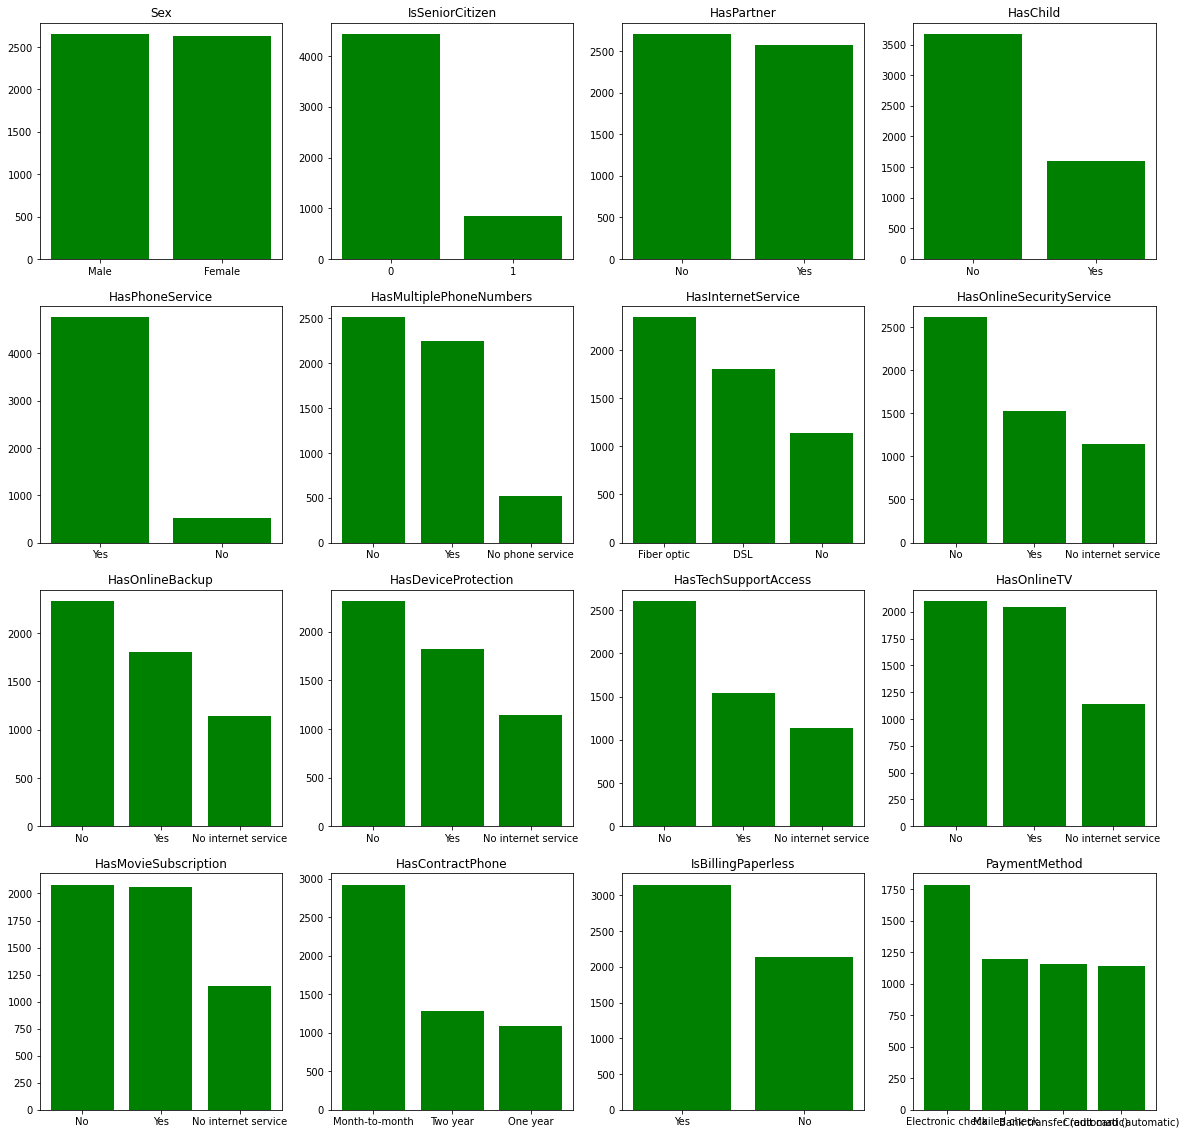

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
ax = ax.ravel()
for h, col in enumerate(cat_cols):
    objects_count = train_data[col].value_counts()
    names = list(objects_count.index)
    names_count = len(names)
    counts = list(objects_count)
    
    ax[h].bar(np.arange(names_count), counts, color = "green")
    ax[h].set_xticks(np.arange(names_count))
    ax[h].set_xticklabels(names)
    ax[h].set_title(col)

Далее было рассмотрено распределение целевой переменной (Churn). 

Класс 1 содержит около 0,25 части данных, то есть люди, в основном, остаются. 

Можно сказать, что данные классы не являются несбалансированными.

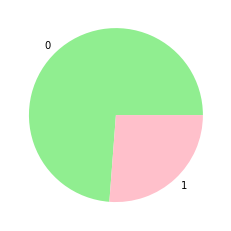

In [ ]:
plt.pie(train_data[target_col].value_counts(), labels=list(train_data[target_col].value_counts().index), colors = ['lightgreen', 'pink'])
plt.show()

Круговые диаграммы для категориальных данных:

<ipython-input-83-bcf4940e5db4>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i+1)


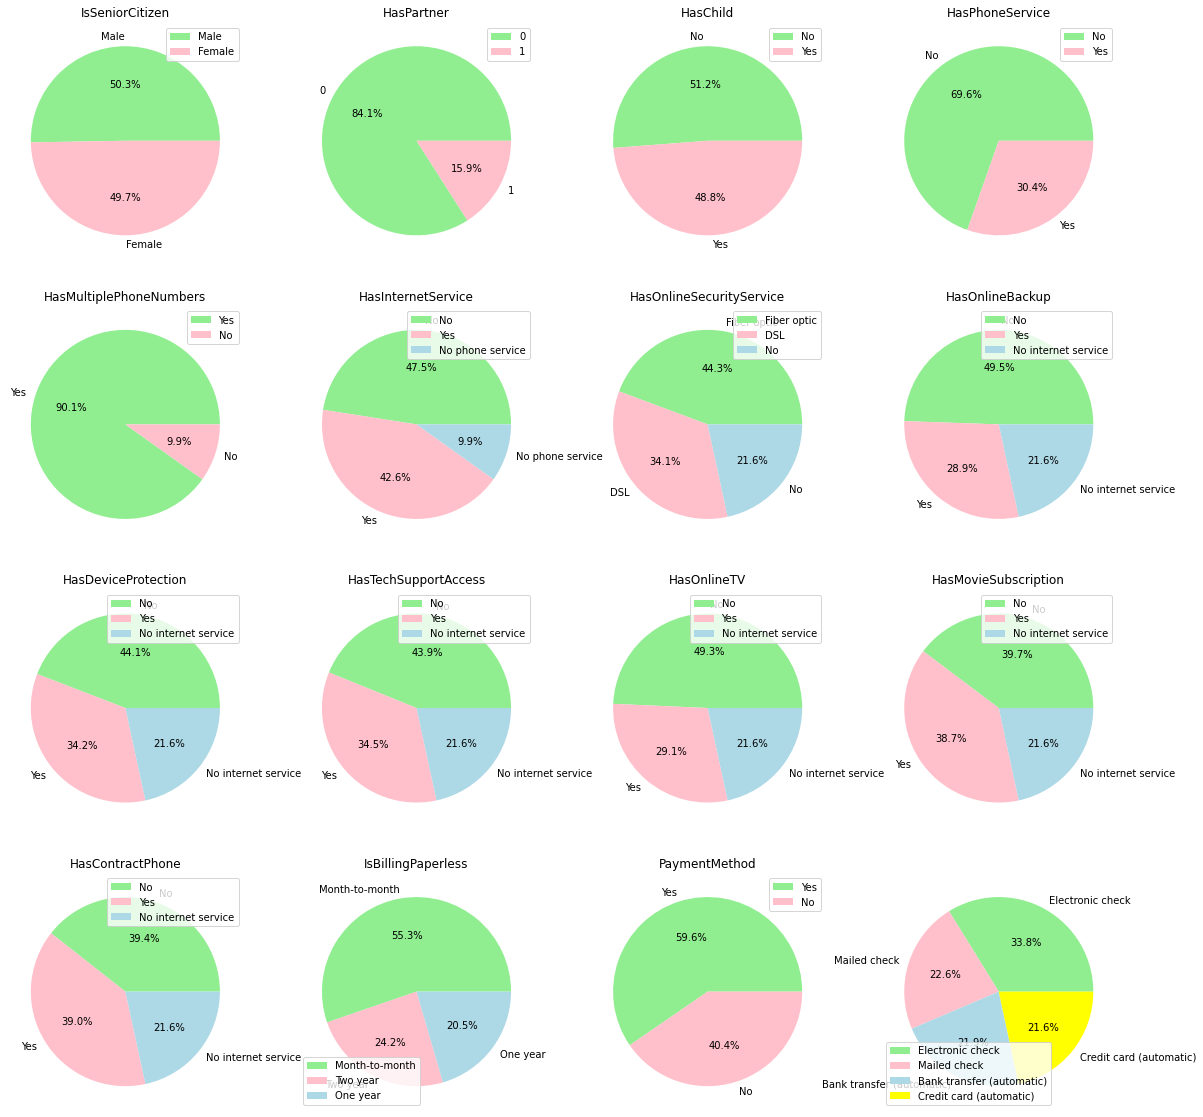

In [ ]:
fig = plt.figure(figsize=(20, 20))
i=0
for col in cat_cols:
    col_data = train_data[col].value_counts()
    plt.title(cat_cols[i])
    plt.subplot(4, 4, i+1)
    plt.pie(col_data, labels = col_data.index, autopct='%1.1f%%', colors=['lightgreen', 'pink', 'lightblue', 'yellow'])
    plt.legend()
    i+=1

Применение линейных моделей


In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
preproc_data_pipeline = ColumnTransformer([
        ('numeric_preproc', StandardScaler(), num_cols),
        ('categorical_preproc', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)])

In [ ]:
cls = make_pipeline(
    preproc_data_pipeline,
    LogisticRegression(random_state=42, solver="saga", max_iter=10000)
)

In [ ]:
firstly_data = train_data[feature_cols]
y_train = train_data[target_col]
X_train = train_data.drop(target_col, axis=1)

In [ ]:
param_grid = {
    'logisticregression__penalty' : ['l1', 'l2', 'elasticnet', None],
    'logisticregression__C': [0.001, 0.001, 0.1, 1, 10, 50, 100, 500, 1000]
    }

CV_model = GridSearchCV(cls, param_grid, cv=5, verbose=0, scoring='roc_auc', refit=True)

In [ ]:
CV_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric_preproc',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('categorical_preproc',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',...
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42,
                                                           solver='saga'))]),
             param_grid={'logisticregression__C': [0.001, 0.001, 0.1, 1, 10, 50,
                                                   100, 500, 1000],
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet', None]},
             scoring='roc_auc')

In [ ]:
print("Best score of ROC-AUC metric:", round(CV_model.best_score_, 4))
CV_model.best_estimator_[1]

Best score of ROC-AUC metric: 0.8451


LogisticRegression(C=500, max_iter=10000, penalty='l1', random_state=42,
                   solver='saga')

Применение градиентного бустинга:




> 1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.





In [178]:
!pip install catboost
import catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [189]:
X_train, X_test, y_train, y_test = train_test_split(train_data[feature_cols], train_data[target_col], train_size=0.8, random_state=42)

In [ ]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=categorical_indices)

boosting_model.fit(X_train, y_train)
y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

Learning rate set to 0.083391
0:	learn: 0.6382749	total: 85.7ms	remaining: 17.1s
1:	learn: 0.5970973	total: 113ms	remaining: 11.1s
2:	learn: 0.5610080	total: 146ms	remaining: 9.57s
3:	learn: 0.5329491	total: 168ms	remaining: 8.23s
4:	learn: 0.5112068	total: 191ms	remaining: 7.43s
5:	learn: 0.4930985	total: 216ms	remaining: 6.98s
6:	learn: 0.4800850	total: 236ms	remaining: 6.51s
7:	learn: 0.4681540	total: 263ms	remaining: 6.32s
8:	learn: 0.4583285	total: 292ms	remaining: 6.2s
9:	learn: 0.4494858	total: 322ms	remaining: 6.13s
10:	learn: 0.4439489	total: 344ms	remaining: 5.92s
11:	learn: 0.4371125	total: 388ms	remaining: 6.08s
12:	learn: 0.4311122	total: 426ms	remaining: 6.13s
13:	learn: 0.4264039	total: 453ms	remaining: 6.01s
14:	learn: 0.4222915	total: 489ms	remaining: 6.03s
15:	learn: 0.4190003	total: 510ms	remaining: 5.87s
16:	learn: 0.4153313	total: 543ms	remaining: 5.84s
17:	learn: 0.4132986	total: 579ms	remaining: 5.85s
18:	learn: 0.4116653	total: 614ms	remaining: 5.84s
19:	learn: 

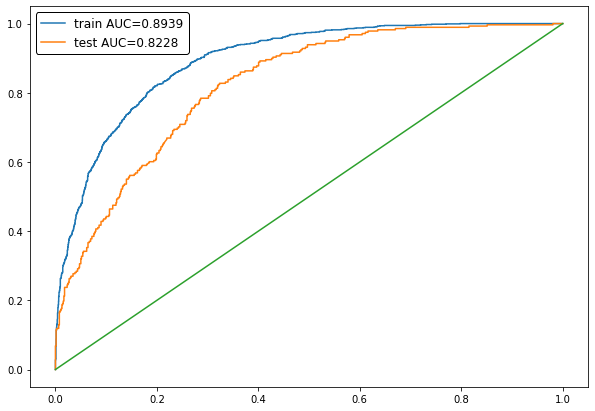

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()



> 2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.



In [ ]:
boosting_model2 = catboost.CatBoostClassifier(silent=True,
                                             cat_features=categorical_indices)
grid_params = {
    'iterations': [50, 100, 200, 300, 400, 500, 600, 700, 800],
    'depth': [3, 4, 5, 6, 7]
}

CV_model_catboost = GridSearchCV(boosting_model2, param_grid=grid_params)
CV_model_catboost.fit(X_train, y_train)

y_train_pred = CV_model_catboost.predict_proba(X_train)[:, 1]
y_test_pred = CV_model_catboost.predict_proba(X_test)[:, 1]

print(f'Best ROC-AUC score for train data: {roc_auc_score(y_train, y_train_pred)} \nBest ROC-AUC score for test data: {roc_auc_score(y_test, y_test_pred)}')
print(f'Best params: {CV_model_catboost.best_params_}')

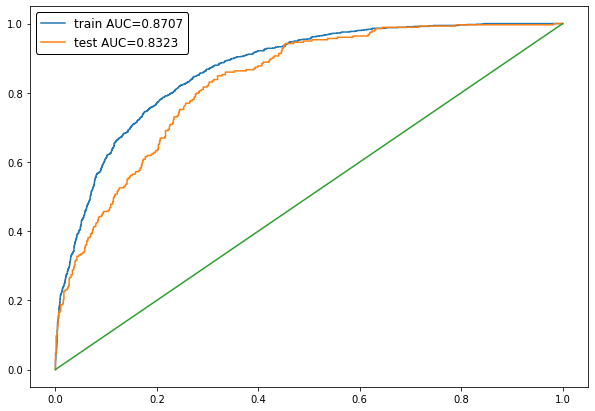

In [190]:
best_model = catboost.CatBoostClassifier(depth=4, iterations=250, learning_rate=0.05, min_data_in_leaf=100, logging_level='Silent')

best_model.fit(X_train, y_train, cat_features=cat_cols)
y_train_predicted = best_model.predict_proba(X_train)[:, 1]
y_test_predicted = best_model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Predictions:

In [191]:
X_test = pd.read_csv('./test.csv')
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], errors='coerce')
X_test["TotalSpent"] = data.TotalSpent.fillna(0).astype(float)
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

In [ ]:
submission

,Id,Churn
0,0,0.044495
1,1,0.807217
2,2,0.843383
3,3,0.023727
4,4,0.003910
...,...,...
1756,1756,0.074607
1757,1757,0.009419
1758,1758,0.760438
1759,1759,0.622214
